In [15]:
import pandas as pd

In [16]:

master_df = pd.read_csv('master_df.csv')

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA


df_electric = master_df[master_df['Fuel Type'] == 'Electric']

columns_to_drop = ['Vehicle Class', 'Vehicle Make', 'Vehicle Model', 'Fuel Type',
                   'Cylinder Capacity Of Engine (c.c.)', 'Rated Power (kW)', 'Body Type',
                   'First Registration Vehicle Status (Note)',
                   'Permitted Gross Vehicle Weight ', 'Number Of Passenger Seats ',
                   'Taxable Value (HK$)']
print(df_electric.columns)

Index(['Vehicle Class', 'Vehicle Make', 'Vehicle Model', 'Fuel Type',
       'Cylinder Capacity Of Engine (c.c.)', 'Rated Power (kW)', 'Body Type',
       'First Registration Vehicle Status (Note)',
       'Permitted Gross Vehicle Weight ', 'Number Of Passenger Seats ',
       'Taxable Value (HK$)', 'Year Of Manufacture'],
      dtype='object')


In [18]:
df_electric = pd.read_csv('master_df-1.csv')
df_electric

,Fuel Type,Count,Date
0,Diesel,614,apr2021
1,Electric,629,apr2021
2,LPG,118,apr2021
3,Petrol,3300,apr2021
4,Diesel,538,apr2022
...,...,...,...
224,Petrol,2301,sep2022
225,Diesel,353,sep2023
226,Electric,2288,sep2023
227,LPG,112,sep2023


In [19]:
df = pd.read_csv('master_df-1.csv')
df_electric=df[df['Fuel Type']=='Electric']

df_petrol= df[df['Fuel Type']=='Petrol']
df_electric.set_index('Date', inplace=True)
df_petrol.set_index('Date', inplace=True)
df_electric.index = pd.to_datetime(df_electric.index, format='%b%Y')
df_petrol.index = pd.to_datetime(df_petrol.index, format='%b%Y')
df_electric.sort_index(inplace=True)
df_petrol.sort_index(inplace=True)
df_electric.index = df_electric.index.to_period('M')
df_petrol.index = df_petrol.index.to_period('M')
df_electric.drop(columns='Fuel Type', inplace  = True)
df_petrol.drop(columns='Fuel Type', inplace  = True)
df_petrol

C:\Users\User\AppData\Local\Temp\ipykernel_9756\131611350.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.sort_index(inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_9756\131611350.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_petrol.sort_index(inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_9756\131611350.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_electric.drop(columns='Fuel Type

,Count
Date,
2019-11,3316
2019-12,3546
2020-01,2635
2020-02,2227
2020-03,3009
2020-05,3514
2020-06,3393
2020-07,3920
2020-08,3414


Current data:
Count: Date
2019-11     428
2019-12     394
2020-01     121
2020-02     197
2020-03     596
2020-05     156
2020-06     145
2020-07     106
2020-08     992
2020-09     453
2020-10      95
2020-11     789
2020-12     824
2021-01     226
2021-02     483
2021-03     571
2021-04     629
2021-05     956
2021-06     588
2021-07     901
2021-08     704
2021-09    1006
2021-10     838
2021-11    1666
2021-12    1149
2022-01     514
2022-02     897
2022-03    1847
2022-04     423
2022-05     380
2022-06    1331
2022-07    1009
2022-08    2293
2022-09    2787
2022-10    2977
2022-11    2844
2022-12    2758
2023-01    1555
2023-02    2657
2023-03    2284
2023-04    1745
2023-05    2731
2023-06    2585
2023-07    2300
2023-08    2799
2023-09    2288
2023-10    2483
2023-11    2602
2023-12    3089
2024-01    3206
2024-02    3539
2024-03    4937
2024-04    5425
2024-05    1727
2024-06    1560
2024-07    1743
2024-08    2111
Freq: M, Name: Count, dtype: int64


<Figure size 1200x600 with 0 Axes>

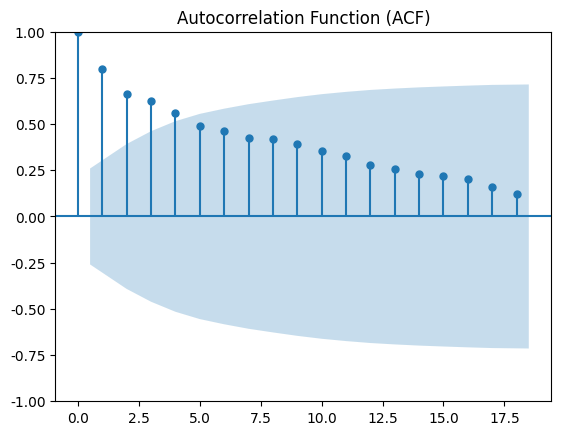

<Figure size 1200x600 with 0 Axes>

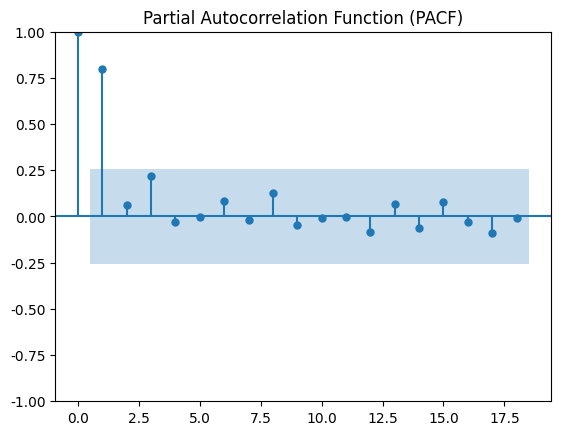

                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                   57
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -444.782
Date:                Thu, 24 Oct 2024   AIC                            901.564
Time:                        10:15:38   BIC                            913.716
Sample:                    11-30-2019   HQIC                           906.276
                         - 08-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4325      0.341      1.269      0.205      -0.236       1.101
ar.L2         -0.2364      0.217     -1.091      0.275      -0.661       0.188
ar.L3          0.1142      0.249      0.458      0.6

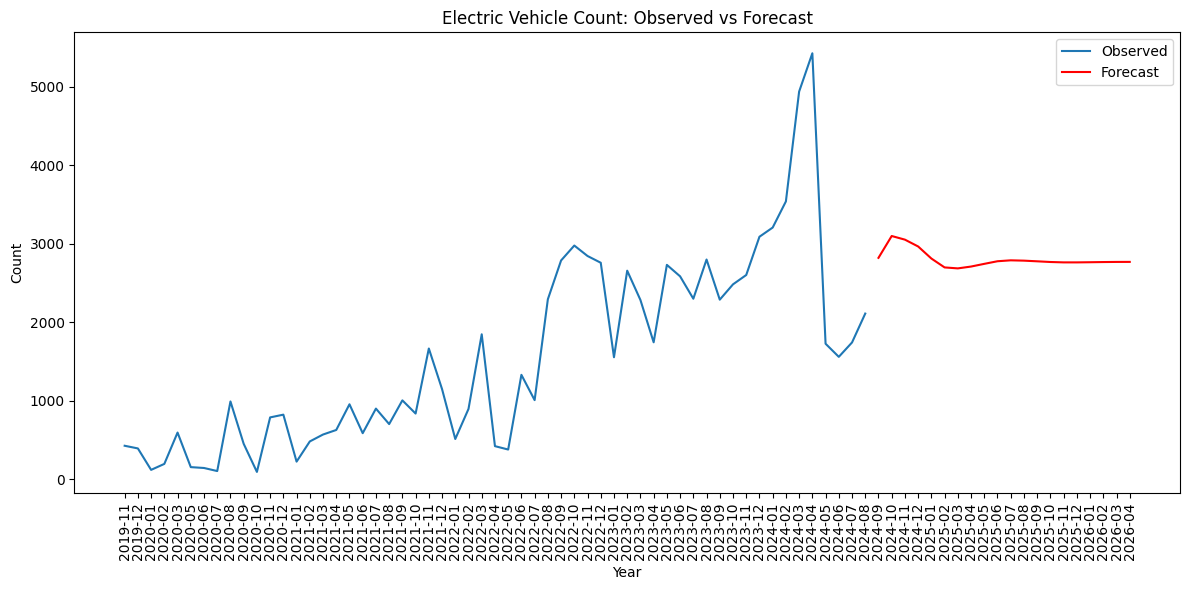


Forecast for the next 10 years:


TypeError: unsupported format string passed to Series.__format__

In [20]:




print("Current data:")
for year, count in df_electric.items():
    print(f"{year}: {count}")

plt.figure(figsize=(12, 6))
plot_acf(df_electric)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df_electric, method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

model = ARIMA(df_electric, order=(4,1,1))
model_fit = model.fit()


print(model_fit.summary())

forecast_steps = 20
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(df_electric.index.astype(str), df_electric.values, label='Observed')
forecast_index = pd.period_range(start=df_electric.index[-1] + 1, periods=forecast_steps, freq='M')
plt.plot(forecast_index.astype(str), forecast, color='red', label='Forecast')
plt.title('Electric Vehicle Count: Observed vs Forecast')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("\nForecast for the next 10 years:")
last_observed = df_electric.iloc[-1]
for year, value in zip(forecast_index.astype(str), forecast):
    increase_percent = (value - last_observed) / last_observed * 100
    print(f"{year}: {value:.0f} (Increase: {increase_percent:.2f}%)")
    last_observed = value

total_increase_percent = (forecast[-1] - df_electric.iloc[-1]) / df_electric.iloc[-1] * 100
print(f"\nTotal increase over 10 years: {total_increase_percent:.2f}%")

Current data:
Count: Date
2019-11    3316
2019-12    3546
2020-01    2635
2020-02    2227
2020-03    3009
2020-05    3514
2020-06    3393
2020-07    3920
2020-08    3414
2020-09    4479
2020-10    4181
2020-11    4248
2020-12    3902
2021-01    3007
2021-02    2630
2021-03    3746
2021-04    3300
2021-05    3387
2021-06    4113
2021-07    3589
2021-08    3187
2021-09    3278
2021-10    2550
2021-11    3025
2021-12    2927
2022-01    2233
2022-02    1479
2022-03    1879
2022-04    2211
2022-05    2424
2022-06    2360
2022-07    2261
2022-08    2192
2022-09    2301
2022-10    2044
2022-11    2094
2022-12    1692
2023-01    1355
2023-02    1702
2023-03    1920
2023-04    1512
2023-05    1743
2023-06    1890
2023-07    1683
2023-08    1686
2023-09    1533
2023-10    1671
2023-11    1983
2023-12    1584
2024-01    1617
2024-02    1245
2024-03    1353
2024-04    1369
2024-05    1519
2024-06    1367
2024-07    1522
2024-08    1474
Freq: M, Name: Count, dtype: int64


<Figure size 1200x600 with 0 Axes>

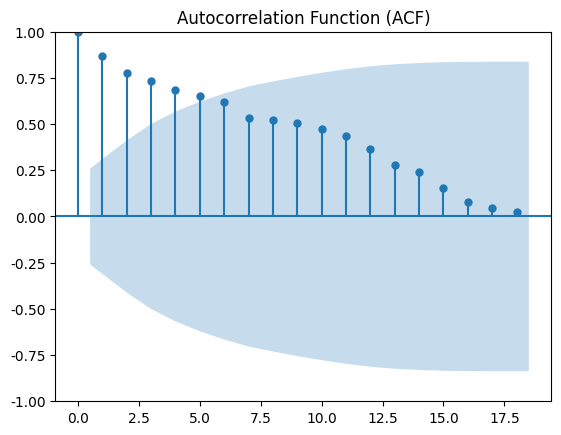

<Figure size 1200x600 with 0 Axes>

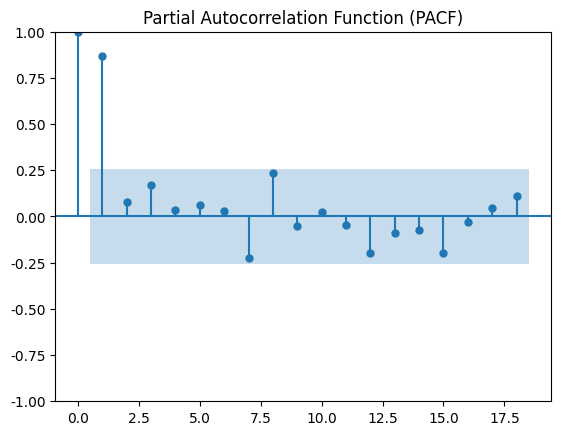

                               SARIMAX Results                                
Dep. Variable:                  Count   No. Observations:                   57
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -416.792
Date:                Thu, 24 Oct 2024   AIC                            845.583
Time:                        09:15:29   BIC                            857.736
Sample:                    11-30-2019   HQIC                           850.295
                         - 08-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3096      0.911      0.340      0.734      -1.475       2.094
ar.L2         -0.1656      0.224     -0.740      0.459      -0.604       0.273
ar.L3          0.0512      0.289      0.177      0.8

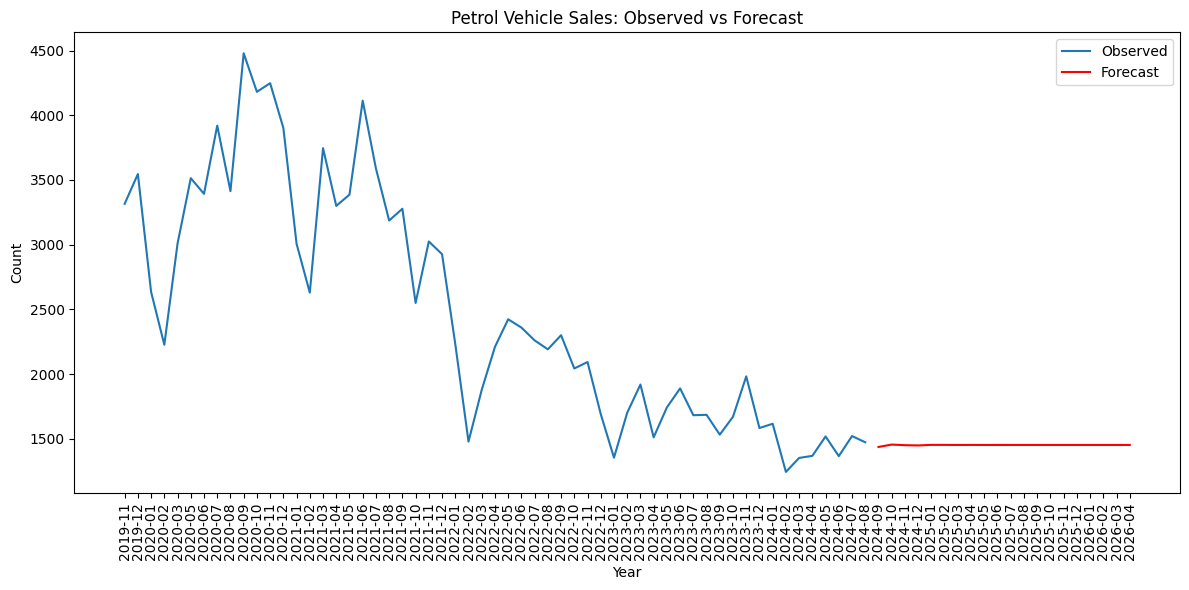


Forecast for the next 10 years:


TypeError: unsupported format string passed to Series.__format__

In [12]:


print("Current data:")
for year, count in df_petrol.items():
    print(f"{year}: {count}")

plt.figure(figsize=(12, 6))
plot_acf(df_petrol)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df_petrol, method='ywm')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

model = ARIMA(df_petrol, order=(4,1,1))
model_fit = model.fit()


print(model_fit.summary())

forecast_steps = 20
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(df_petrol.index.astype(str), df_petrol.values, label='Observed')
forecast_index = pd.period_range(start=df_petrol.index[-1] + 1, periods=forecast_steps, freq='M')
plt.plot(forecast_index.astype(str), forecast, color='red', label='Forecast')
plt.title('Petrol Vehicle Sales: Observed vs Forecast')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("\nForecast for the next 10 years:")
last_observed = df_petrol.iloc[-1]
for year, value in zip(forecast_index.astype(str), forecast):
    increase_percent = (value - last_observed) / last_observed * 100
    print(f"{year}: {value:.0f} (Increase: {increase_percent:.2f}%)")
    last_observed = value

total_increase_percent = (forecast[-1] - df_petrol.iloc[-1]) / df_petrol.iloc[-1] * 100
print(f"\nTotal increase over 10 years: {total_increase_percent:.2f}%")

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt, exp

df_electric_log = np.log1p(df_electric)

X = df_electric_log.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]


model = auto_arima(train, start_p=1, start_q=1, max_p=5, max_q=5, m=1,
                   start_P=0, seasonal=False, d=1, D=1, trace=True,
                   error_action='ignore', suppress_warnings=True, stepwise=True)


history = [x for x in train]
predictions = []

print("Making predictions:")
for t in range(len(test)):
    model_fit = model.fit(history)
    output = model_fit.predict(n_periods=1)
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'predicted={exp(yhat)-1:.2f}, expected={exp(obs)-1:.2f}')


predictions = np.expm1(predictions)
test = np.expm1(test)


rmse = sqrt(mean_squared_error(test, predictions))
mape = np.mean(np.abs((test - predictions) / test)) * 100

print(f'\nTest RMSE: {rmse}')
print(f'Test MAPE: {mape}%')



fig, ax1 = plt.subplots(figsize=(12, 6))
test_index = df_electric.index[-len(test):].to_timestamp()

ax1.set_xlabel('Year')
ax1.set_ylabel('Observed Count', color='blue')
ax1.plot(test_index, test, color='blue', label='Observed', marker='o')
ax1.tick_params(axis='y', labelcolor='blue')


for i, obs in enumerate(test):
    ax1.annotate(f'{obs:.0f}', (test_index[i], obs), textcoords="offset points",
                 xytext=(0,10), ha='center', va='bottom', color='blue')


ax2 = ax1.twinx()
ax2.set_ylabel('Predicted Count', color='red')
ax2.plot(test_index, predictions, color='red', label='Predicted', linestyle='--', marker='s')
ax2.tick_params(axis='y', labelcolor='red')


for i, pred in enumerate(predictions):
    ax2.annotate(f'{pred:.0f}', (test_index[i], pred), textcoords="offset points",
                 xytext=(0,-10), ha='center', va='top', color='red')


plt.title('ARIMA Model: Observed vs Predicted')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


print("\nLast years comparison:")
for year, actual, predicted in zip(df_electric.index[-len(test):], test, predictions):
    print(f"{year}: Actual = {actual:.2f}, Predicted = {predicted:.2f}")


last_year_error = (predictions[-1] - test[-1]) / test[-1] * 100
print(f"\nLast year prediction error: {last_year_error:.2f}%")

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject